# WELCOME!

Welcome to "***Clustering (Customer Segmentation) Project***". This is the last medium project of ***Machine Learning*** course. 

At the end of this project, you will have performed ***Cluster Analysis*** with an ***Unsupervised Learning*** method.

---

In this project, customers are required to be segmented according to the purchasing history obtained from the membership cards of a big mall.

This project is less challenging than other projects. After getting to know the data set quickly, you are expected to perform ***Exploratory Data Analysis***. You should observe the distribution of customers according to different variables, also discover relationships and correlations between variables. Then you will spesify the different variables to use for cluster analysis.

Finally, you should clustered customers using the ***K-Means Clustering*** method, after that label the clusters.

- ***NOTE:*** *This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind Cluster Analysis and scikit-learn module as well as Machine Learning before you begin.*

---
---

# #Tasks

Mentoring Prep. and self study#### 

#### 1. Import Libraries, Load Dataset, Exploring Data
- Import Libraries
- Load Dataset
- Explore Data

#### 2. Exploratory Data Analysis (EDA)


#### 3. Cluster Analysis

- Clustering based on Age and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Clustering based on Annual Income and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Hierarchical Clustering

    *i. Determine optimal number of clusters using Dendogram*

    *ii. Apply Agglomerative Clustering*

    *iii. Visualizing and Labeling All the Clusters* 

- Conclusion

---
---

## 1. Import Libraries, Load Dataset, Exploring Data

There is a big mall in a specific city that keeps information of its customers who subscribe to a membership card. In the membetrship card they provide following information : gender, age and annula income. The customers use this membership card to make all the purchases in the mall, so tha mall has the purchase history of all subscribed members and according to that they compute the spending score of all customers. You have to segment these customers based on the details given. 

#### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

%matplotlib inline
# %matplotlib notebook
# plt.rcParams["figure.figsize"] = (10,6)
plt.rcParams['figure.dpi'] = 100
sns.set_style("whitegrid")
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)

#### Load Dataset

In [2]:
data = pd.read_csv("Mall_Customers.csv")
df =  data.copy()

In [3]:
df.shape

(200, 5)

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#### Explore Data

You can rename columns to more usable, if you need.

In [5]:
df.rename(columns = {'Annual Income (k$)':'income', 'Spending Score (1-100)':'score'}, inplace = True)

In [6]:
df.head()

,CustomerID,Gender,Age,income,score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   CustomerID  200 non-null    int64 
 1   Gender      200 non-null    object
 2   Age         200 non-null    int64 
 3   income      200 non-null    int64 
 4   score       200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
df.Gender.value_counts(dropna=False)

Female    112
Male       88
Name: Gender, dtype: int64

In [9]:
df.isna().sum()

CustomerID    0
Gender        0
Age           0
income        0
score         0
dtype: int64

In [10]:
for col in df.columns:
    print(col)
    print(df[col].nunique())
    print("-------------")

CustomerID
200
-------------
Gender
2
-------------
Age
51
-------------
income
64
-------------
score
84
-------------


In [11]:
df.duplicated().sum()

0

---
---

## 2. Exploratory Data Analysis (EDA)

After performing Cluster Analysis, you need to know the data well in order to label the observations correctly. Analyze frequency distributions of features, relationships and correlations between the independent variables and the dependent variable. It is recommended to apply data visualization techniques. Observing breakpoints helps you to internalize the data.





In [12]:
df.head()

,CustomerID,Gender,Age,income,score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [13]:
# we wont use CustomerID so that i will drop it
df.drop("CustomerID", axis = 1, inplace=True)

In [14]:
df.head()

,Gender,Age,income,score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


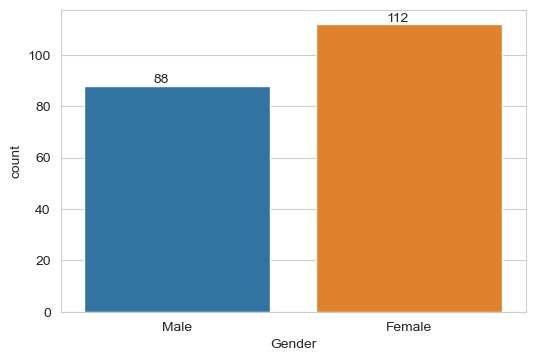

In [15]:
ax = sns.countplot(df.Gender)
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.30, p.get_height()+1))

In [16]:
age = df.Age.unique()

In [17]:
age.sort()
age

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 63, 64, 65, 66, 67, 68, 69, 70],
      dtype=int64)

In [18]:
df["Age_category"] = df.Age.map({
    18: "18&19", 19: "18&19",
    20: "Twenties", 21: "Twenties", 22: "Twenties", 23: "Twenties", 24: "Twenties", 25: "Twenties", 26: "Twenties", 27: "Twenties", 28: "Twenties", 29: "Twenties",
    30: "Thirties", 31: "Thirties", 32: "Thirties", 33: "Thirties", 34: "Thirties", 35: "Thirties", 36: "Thirties", 37: "Thirties", 38: "Thirties", 39: "Thirties",
    40: "Fourties", 41: "Fourties", 42: "Fourties", 43: "Fourties", 44: "Fourties", 45: "Fourties", 46: "Fourties", 47: "Fourties", 48: "Fourties", 49: "Fourties",
    50: "Fifties", 51 : "Fifties", 52: "Fifties", 53: "Fifties", 54: "Fifties", 55: "Fifties", 56: "Fifties", 57: "Fifties", 58: "Fifties", 59: "Fifties",
    60: "Over Sixty", 63: "Over Sixty", 64: "Over Sixty", 65: "Over Sixty", 66: "Over Sixty", 67: "Over Sixty", 68: "Over Sixty", 69: "Over Sixty", 70: "Over Sixty"
})

In [19]:
df.Age_category.value_counts(dropna=False)

Thirties      61
Twenties      43
Fourties      39
Fifties       25
Over Sixty    20
18&19         12
Name: Age_category, dtype: int64

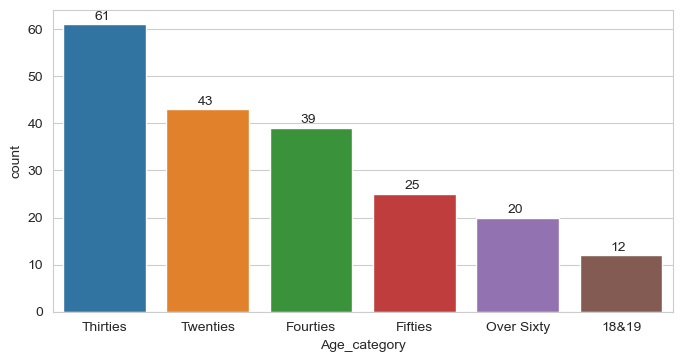

In [20]:
plt.rcParams["figure.figsize"] = (8,4)
ax = sns.countplot(df.Age_category, order = df.Age_category.value_counts().index)
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.30, p.get_height()+1))

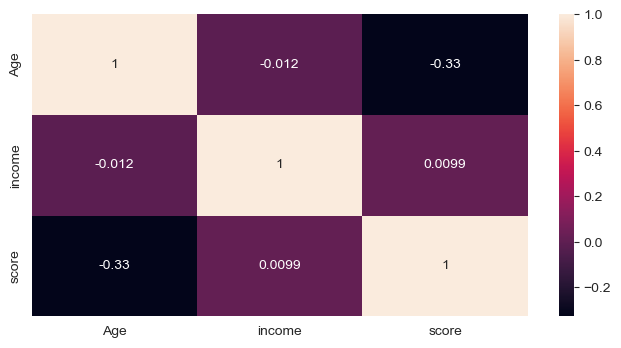

In [21]:
sns.heatmap(df.corr(), annot=True);

<Figure size 1200x600 with 0 Axes>

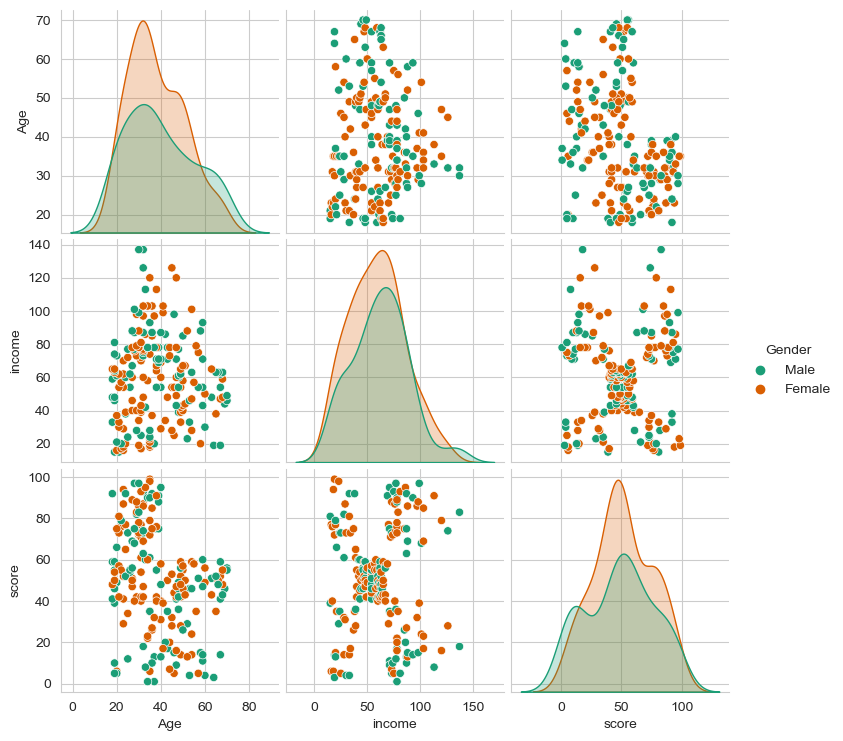

In [22]:
plt.figure(figsize=(12,6))
sns.pairplot(df,hue='Gender',palette='Dark2')

In [23]:
df.reset_index(drop=True, inplace=True)

---
---

## 3. Cluster Analysis

The main purpose of this project is to perform [cluster analysis](https://en.wikipedia.org/wiki/Cluster_analysis#:~:text=Cluster%20analysis%20or%20clustering%20is,in%20other%20groups%20(clusters).) with the [K-Means](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) algorithm. 

You can perform many [cluster analysis](http://www.stat.columbia.edu/~madigan/W2025/notes/clustering.pdf) using different variables. If you use a maximum of two variables for each cluster analysis, you can identify cluster labels more clearly.

First, the K-Means algorithm expects you to determine the number of clusters (*n_clusters*). You can determine the optimal number of clusters for each cluster analysis in various ways. In this case, you are expected to use the [Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering).

Finally, different information is obtained in each analysis. Therefore, different labeling should be done as a result of each cluster analysis. 

Labeling example: 

- **Normal Customers**  -- An Average consumer in terms of spending and Annual Income
- **Spender Customers** --  Annual Income is less but spending high, so can also be treated as potential target customer.

### Clustering based on Age and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [24]:
df.head()

,Gender,Age,income,score,Age_category
0,Male,19,15,39,18&19
1,Male,21,15,81,Twenties
2,Female,20,16,6,Twenties
3,Female,23,16,77,Twenties
4,Female,31,17,40,Thirties


In [25]:
df2 = pd.concat([df.Age, df.score],axis=1)
df2.head()

,Age,score
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40


#### *ii. Determine optimal number of clusters*

<Figure size 1200x600 with 0 Axes>

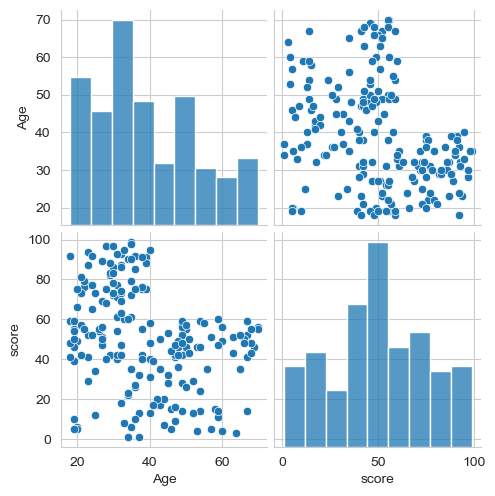

In [26]:
plt.figure(figsize=(12,6))
sns.pairplot(df2, palette='Dark2');

### Why silhouette_score is negative?

![image.png](attachment:image.png)

#### *iii. Apply K Means*

In [27]:
from sklearn.cluster import KMeans

In [28]:
X_df2 = df2

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_df2_std = scaler.fit_transform(X_df2)

####  With scaled data

In [30]:
K_means_df2_std = KMeans(n_clusters = 3, random_state = 34, n_init = 5)

In [31]:
K_means_df2_std.fit_predict(X_df2_std)

array([2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 0, 1, 0, 1, 2, 1, 2, 1, 0, 1, 2, 1,
       2, 1, 0, 1, 2, 1, 2, 1, 0, 1, 0, 1, 2, 1, 2, 1, 2, 1, 0, 1, 0, 1,
       0, 1, 0, 2, 2, 2, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 2, 0, 0, 0, 0, 0, 1, 0, 2, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 2, 0, 2, 2, 1, 0, 1, 0, 1, 2, 0, 0, 1, 0, 2, 0, 0, 0, 0,
       0, 1, 2, 1, 1, 1, 0, 0, 0, 0, 1, 2, 1, 1, 2, 1, 2, 1, 0, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1,
       0, 1, 0, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

In [32]:
df["Classes_df2_std"] = K_means_df2_std.labels_
df.head()

,Gender,Age,income,score,Age_category,Classes_df2_std
0,Male,19,15,39,18&19,2
1,Male,21,15,81,Twenties,1
2,Female,20,16,6,Twenties,2
3,Female,23,16,77,Twenties,1
4,Female,31,17,40,Thirties,2


In [33]:
df2_std_c = pd.DataFrame(data=X_df2_std, columns=["Age", "score"])
df2_std_c["Classes_df2_std"] = K_means_df2_std.labels_
df2_std_c.head() # i will use for visualization

,Age,score,Classes_df2_std
0,-1.425,-0.435,2
1,-1.281,1.196,1
2,-1.353,-1.716,2
3,-1.138,1.040,1
4,-0.563,-0.396,2


####  Without scaled data

In [34]:
K_means_df2 = KMeans(n_clusters = 3, random_state = 34, n_init = 5)

In [35]:
K_means_df2.fit_predict(X_df2)

array([2, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 2, 1,
       0, 1, 0, 1, 2, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 2, 2,
       0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1,
       2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1])

In [36]:
df["Classes_df2"] = K_means_df2.labels_
df.head()

,Gender,Age,income,score,Age_category,Classes_df2_std,Classes_df2
0,Male,19,15,39,18&19,2,2
1,Male,21,15,81,Twenties,1,1
2,Female,20,16,6,Twenties,2,0
3,Female,23,16,77,Twenties,1,1
4,Female,31,17,40,Thirties,2,2


#### *iv. Visualizing and Labeling All the Clusters*

In [37]:
df.head()

,Gender,Age,income,score,Age_category,Classes_df2_std,Classes_df2
0,Male,19,15,39,18&19,2,2
1,Male,21,15,81,Twenties,1,1
2,Female,20,16,6,Twenties,2,0
3,Female,23,16,77,Twenties,1,1
4,Female,31,17,40,Thirties,2,2


In [38]:
df.Classes_df2.value_counts() #unscaled data

2    91
1    62
0    47
Name: Classes_df2, dtype: int64

In [39]:
df.Classes_df2_std.value_counts() #scaled_data

1    84
0    62
2    54
Name: Classes_df2_std, dtype: int64

There is differences with scaled data and unscaled data

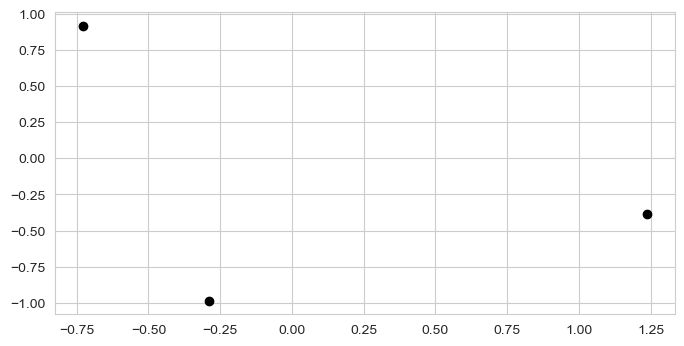

In [40]:
centers_std = K_means_df2_std.cluster_centers_
plt.scatter(centers_std[:,0], centers_std[:,1], c = "black")

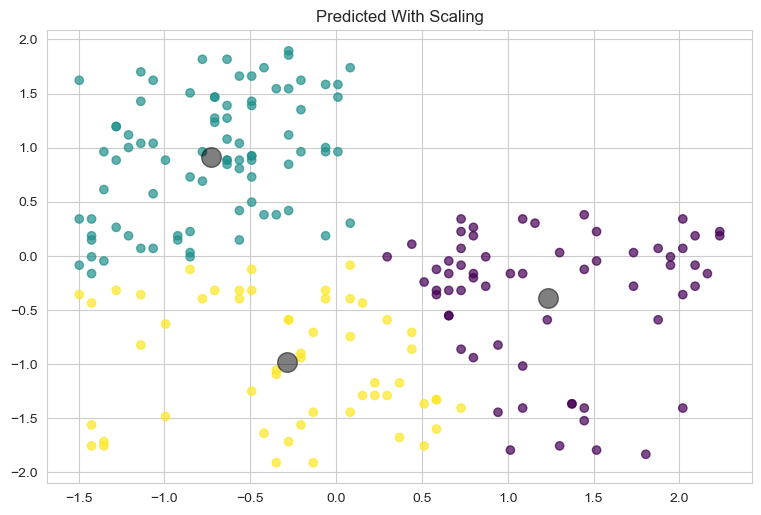

In [41]:
plt.figure(figsize = (20,6))

plt.subplot(121)
plt.scatter(df2_std_c["Age"], df2_std_c["score"], c= df2_std_c["Classes_df2_std"], cmap = "viridis", alpha=0.7)
plt.title("Predicted With Scaling")
plt.scatter(centers_std[:,0], centers_std[:,1], c = "black",s=200, alpha=0.5);

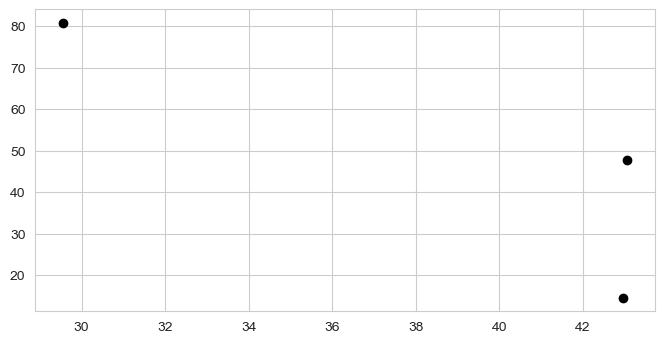

In [42]:
centers = K_means_df2.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c = "black")

In [43]:
df2.head()

,Age,score
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40


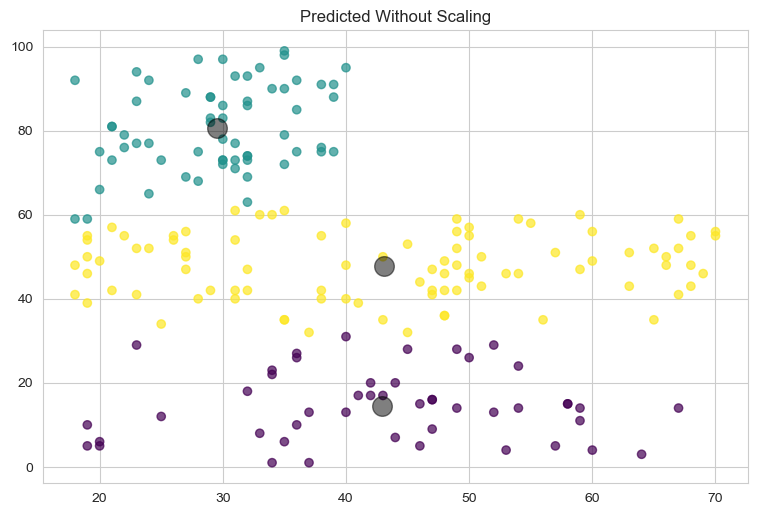

In [44]:
plt.figure(figsize = (20,6))

plt.subplot(122)
plt.scatter(df["Age"], df["score"], c= df["Classes_df2"], cmap = "viridis", alpha=0.7)
plt.title("Predicted Without Scaling")
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

### Clustering based on Annual Income and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [45]:
df.head()

,Gender,Age,income,score,Age_category,Classes_df2_std,Classes_df2
0,Male,19,15,39,18&19,2,2
1,Male,21,15,81,Twenties,1,1
2,Female,20,16,6,Twenties,2,0
3,Female,23,16,77,Twenties,1,1
4,Female,31,17,40,Thirties,2,2


In [46]:
df3 = pd.concat([df.score, df.income],axis=1)
df3.head()

,score,income
0,39,15
1,81,15
2,6,16
3,77,16
4,40,17


In [47]:
df3.head()

,score,income
0,39,15
1,81,15
2,6,16
3,77,16
4,40,17


<Figure size 800x600 with 0 Axes>

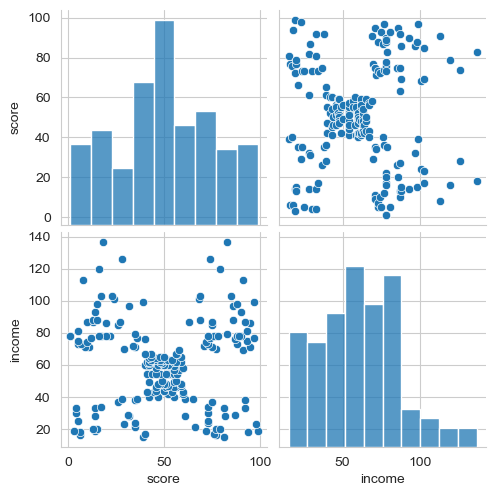

In [48]:
plt.figure(figsize=(8,6))
sns.pairplot(df3, palette='Dark2');

#### Hopkins test

In [49]:
from pyclustertend import hopkins

In [50]:
hopkins(df3, df3.shape[0])

0.2937108439145111

#### *ii. Determine optimal number of clusters*

#### Unscaled Data

In [51]:
X_df3 = df3

In [52]:
ssd = [] 

K = range(2,10)

for k in K:
    KMeans_model_df3 = KMeans(n_clusters =k, random_state=34, n_init= 5)
    KMeans_model_df3.fit(X_df3)
    ssd.append(KMeans_model_df3.inertia_)

###### Elbow Method

Text(0.5, 1.0, 'elbow method')

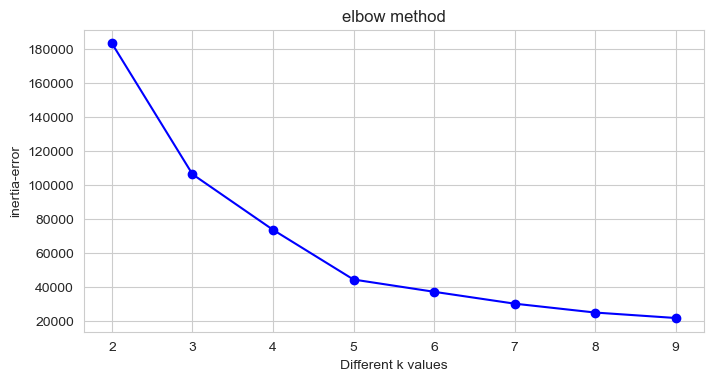

In [53]:
plt.plot(K, ssd, "bo-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error") 
plt.title("elbow method") 

###### KElbowVisualizer from Yellowbrick

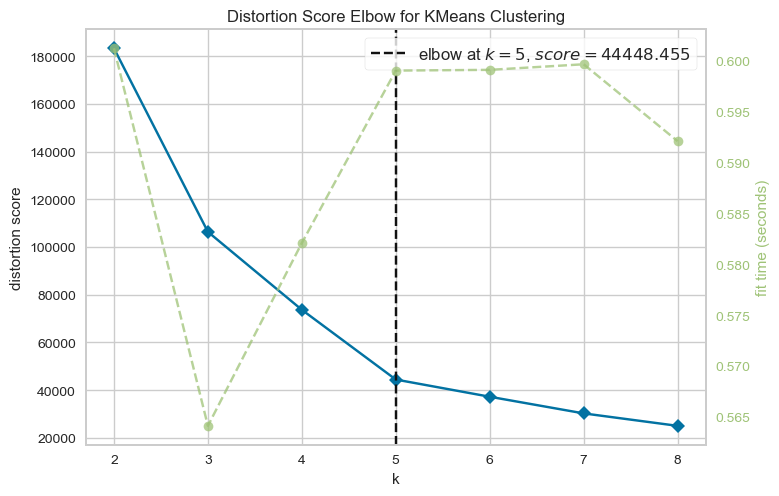

In [54]:
from yellowbrick.cluster import KElbowVisualizer

model_ = KMeans(n_clusters =k, random_state=34, n_init= 5)
visualizer = KElbowVisualizer(model_, k=(2,9))

visualizer.fit(X_df3)        
visualizer.show();

###### Silhouette analysis

In [55]:
from sklearn.metrics import silhouette_score

In [56]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, random_state=34, n_init= 5)
    kmeans.fit(X_df3)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X_df3, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.28311067948967245
For n_clusters=3, the silhouette score is 0.46761358158775435
For n_clusters=4, the silhouette score is 0.4931963109249047
For n_clusters=5, the silhouette score is 0.553931997444648
For n_clusters=6, the silhouette score is 0.5393922132561455
For n_clusters=7, the silhouette score is 0.5264283703685728
For n_clusters=8, the silhouette score is 0.4539560903726814


#### Scaled Data

In [57]:
scaler = StandardScaler()
X_df3_std = scaler.fit_transform(X_df3)

In [58]:
ssd = [] 

K = range(2,10)

for k in K:
    KMeans_model_df3_std = KMeans(n_clusters =k, random_state=34, n_init= 5)
    KMeans_model_df3_std.fit(X_df3_std)
    ssd.append(KMeans_model_df3_std.inertia_)

Text(0.5, 1.0, 'elbow method')

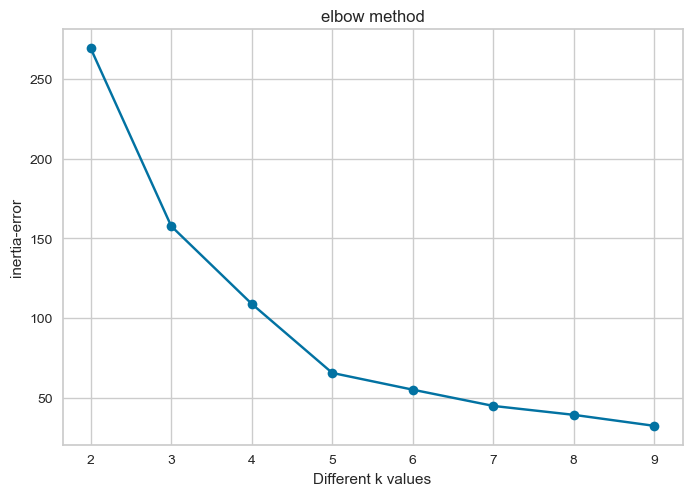

In [59]:
plt.plot(K, ssd, "bo-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error") 
plt.title("elbow method") 

###### KElbowVisualizer from Yellowbrick

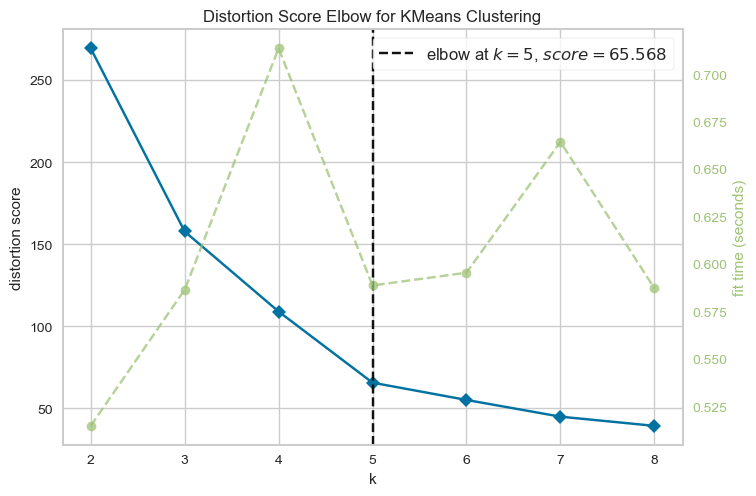

In [60]:
from yellowbrick.cluster import KElbowVisualizer

model_ = KMeans(n_clusters =k, random_state=34, n_init= 5)
visualizer = KElbowVisualizer(model_, k=(2,9))

visualizer.fit(X_df3_std)        
visualizer.show();

###### Silhouette analysis

In [61]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, random_state=34, n_init= 5)
    kmeans.fit(X_df3_std)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X_df3_std, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.28640637225274423
For n_clusters=3, the silhouette score is 0.46658474419000145
For n_clusters=4, the silhouette score is 0.4939069237513199
For n_clusters=5, the silhouette score is 0.5546571631111091
For n_clusters=6, the silhouette score is 0.5398800926790663
For n_clusters=7, the silhouette score is 0.5281492781108291
For n_clusters=8, the silhouette score is 0.45290207812638594


#### *iii. Apply K Means*

#### Unscaled Data

In [62]:
KMeans_model_df3 = KMeans(n_clusters =5, random_state=34, n_init= 5)
KMeans_model_df3.fit(X_df3)

KMeans(n_clusters=5, n_init=5, random_state=34)

In [63]:
KMeans_model_df3.fit_predict(X_df3)

array([2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1,
       2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 4, 3, 1, 3, 4, 3, 4, 3,
       1, 3, 4, 3, 4, 3, 4, 3, 4, 3, 1, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3])

In [64]:
df["Classes_df3"] = KMeans_model_df3.labels_
df.head()

,Gender,Age,income,score,Age_category,Classes_df2_std,Classes_df2,Classes_df3
0,Male,19,15,39,18&19,2,2,2
1,Male,21,15,81,Twenties,1,1,0
2,Female,20,16,6,Twenties,2,0,2
3,Female,23,16,77,Twenties,1,1,0
4,Female,31,17,40,Thirties,2,2,2


In [65]:
df["Classes_df3"].value_counts()

1    81
3    39
4    35
2    23
0    22
Name: Classes_df3, dtype: int64

#### *iv. Visualizing and Labeling All the Clusters*

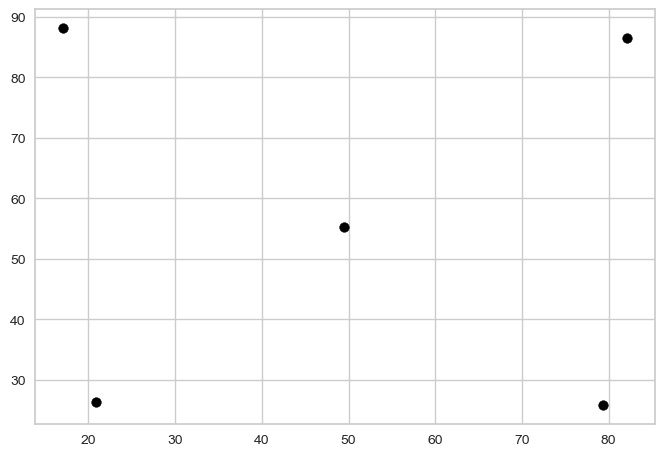

In [66]:
centers = KMeans_model_df3.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c = "black");

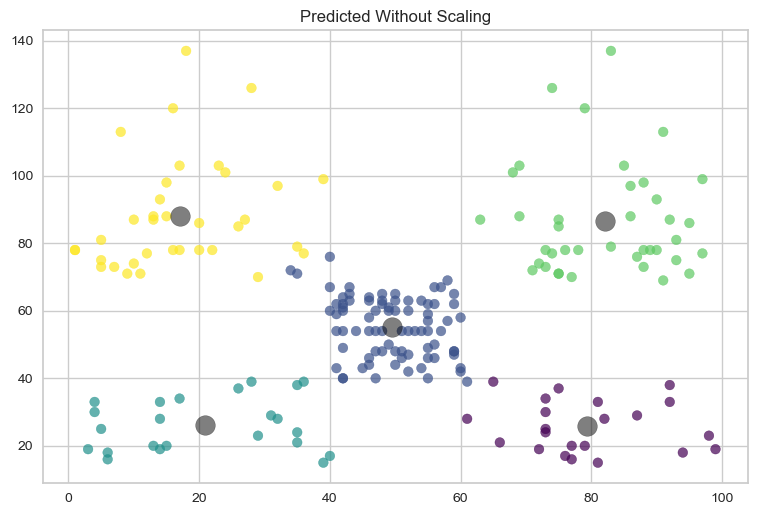

In [67]:
plt.figure(figsize = (20,6))

plt.subplot(122)
plt.scatter(df["score"], df3["income"],  c= df["Classes_df3"], cmap = "viridis", alpha=0.7)
plt.title("Predicted Without Scaling")
plt.scatter(centers[:,0], centers[:,1], c='black', s=200, alpha=0.5);

#### Scaled Data

In [68]:
KMeans_model_df3_std = KMeans(n_clusters =5, random_state=34, n_init= 5)
KMeans_model_df3_std.fit(X_df3_std)

KMeans(n_clusters=5, n_init=5, random_state=34)

In [69]:
KMeans_model_df3_std.fit_predict(X_df3_std)

array([2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1,
       2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 4, 3, 1, 3, 4, 3, 4, 3,
       1, 3, 4, 3, 4, 3, 4, 3, 4, 3, 1, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3])

In [70]:
df["Classes_df3_std"] = KMeans_model_df3_std.labels_
df.head()

,Gender,Age,income,score,Age_category,Classes_df2_std,Classes_df2,Classes_df3,Classes_df3_std
0,Male,19,15,39,18&19,2,2,2,2
1,Male,21,15,81,Twenties,1,1,0,0
2,Female,20,16,6,Twenties,2,0,2,2
3,Female,23,16,77,Twenties,1,1,0,0
4,Female,31,17,40,Thirties,2,2,2,2


In [71]:
df["Classes_df3"].value_counts() #unscaled data

1    81
3    39
4    35
2    23
0    22
Name: Classes_df3, dtype: int64

In [72]:
df["Classes_df3_std"].value_counts() #scaled data

1    81
3    39
4    35
2    23
0    22
Name: Classes_df3_std, dtype: int64

In [73]:
df3_std_c = pd.DataFrame(data=X_df3_std, columns=["score", "income"])
df3_std_c["Classes_df3_std"] = KMeans_model_df3_std.labels_
df3_std_c.head() # i will use for visualization

,score,income,Classes_df3_std
0,-0.435,-1.739,2
1,1.196,-1.739,0
2,-1.716,-1.701,2
3,1.040,-1.701,0
4,-0.396,-1.663,2


#### *iv. Visualizing and Labeling All the Clusters*

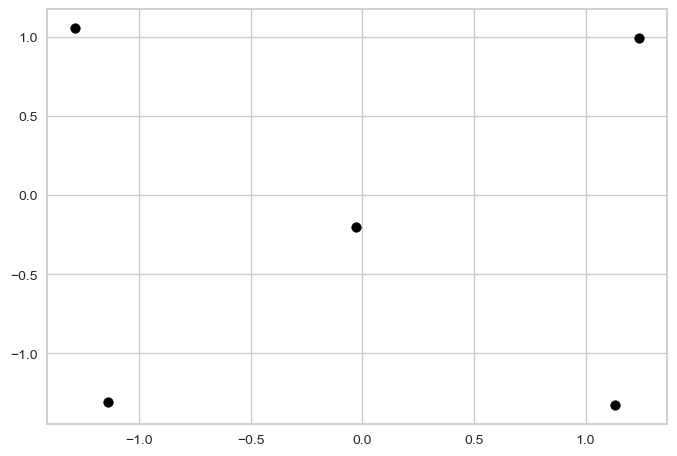

In [74]:
centers_std = KMeans_model_df3_std.cluster_centers_
plt.scatter(centers_std[:,0], centers_std[:,1], c = "black")

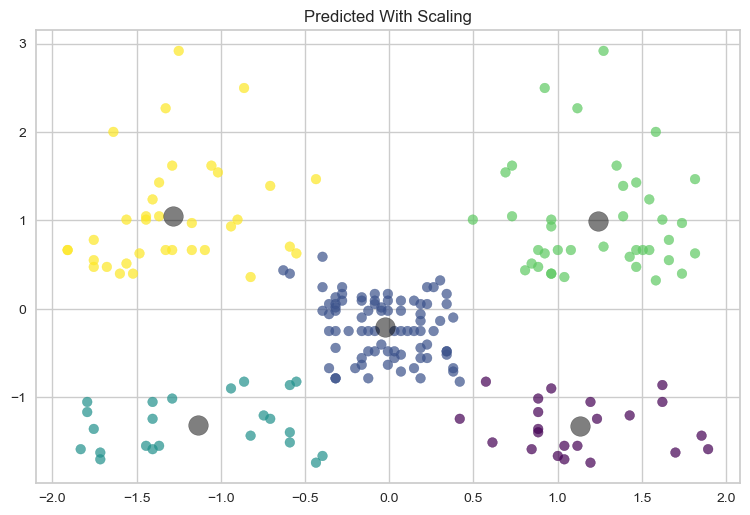

In [75]:
plt.figure(figsize = (20,6))

plt.subplot(122)
plt.scatter(df3_std_c["score"], df3_std_c["income"],  c= df3_std_c["Classes_df3_std"], cmap = "viridis", alpha=0.7)
plt.title("Predicted With Scaling")
plt.scatter(centers_std[:,0], centers_std[:,1], c='black', s=200, alpha=0.5);

### Hierarchical Clustering

### *i. Determine optimal number of clusters using Dendogram*

### Clustering based on Age and Spending Score- x1

#### Unscaled Data

In [76]:
df2.head()

,Age,score
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40


In [77]:
hopkins(df2, df.shape[0])

0.2745789908730937

#### Dendrogram

In [78]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

In [79]:
hc_ward = linkage(y = X_df2, method = "ward")
hc_complete = linkage(X_df2, "complete")
hc_average = linkage(X_df2, "average")
hc_single = linkage(X_df2, "single")

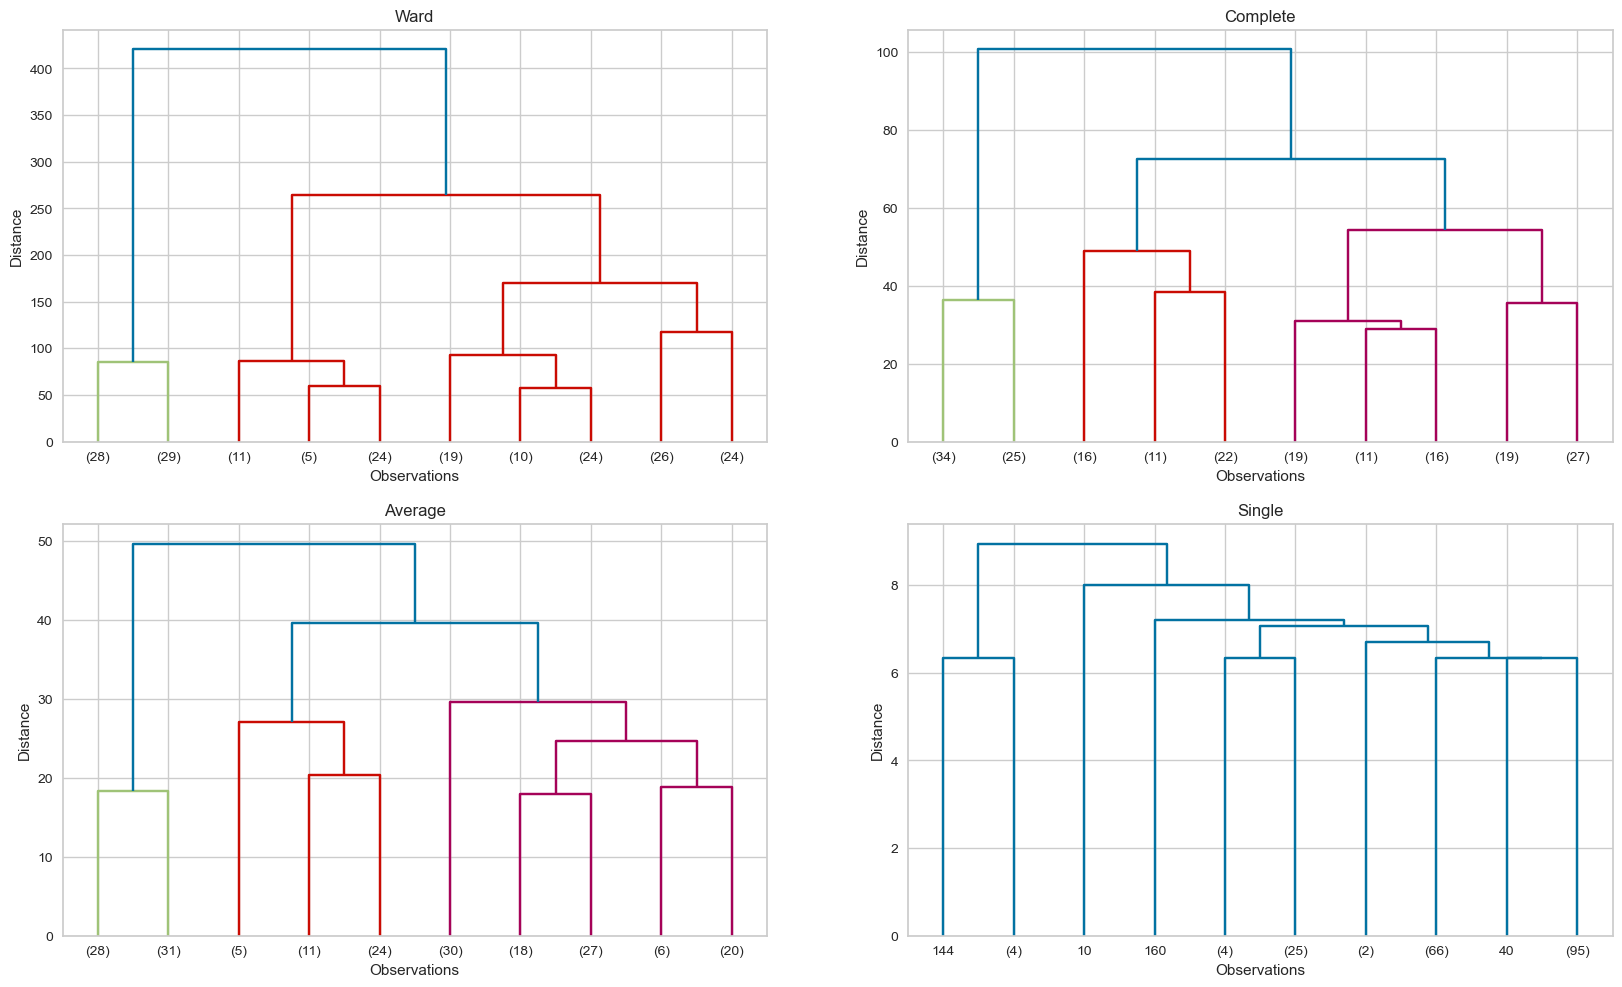

In [80]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size = 10, truncate_mode='lastp', p=10);

In [81]:
from sklearn.metrics import silhouette_score
range_n_clusters = range(2,11)
for num_clusters in range_n_clusters:
    # intialise kmeans
    Agg_model = AgglomerativeClustering(n_clusters=num_clusters)
    Agg_model.fit(X_df2)
    cluster_labels = Agg_model.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X_df2, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.4549465643222241
For n_clusters=3, the silhouette score is 0.4411791686353356
For n_clusters=4, the silhouette score is 0.4602496389565028
For n_clusters=5, the silhouette score is 0.40374071753059787
For n_clusters=6, the silhouette score is 0.4125958704145705
For n_clusters=7, the silhouette score is 0.4158977524079244
For n_clusters=8, the silhouette score is 0.3883688959732531
For n_clusters=9, the silhouette score is 0.3948151533262091
For n_clusters=10, the silhouette score is 0.3876666104778445


#### Scaled Data

In [82]:
X_df2_std[0:2]

array([[-1.42456879, -0.43480148],
       [-1.28103541,  1.19570407]])

In [83]:
hopkins(X_df2_std, X_df2_std.shape[0])

0.2896733411411777

#### Dendrogram

In [84]:
hc_ward = linkage(y = X_df2_std, method = "ward")
hc_complete = linkage(X_df2_std, "complete")
hc_average = linkage(X_df2_std, "average")
hc_single = linkage(X_df2_std, "single")

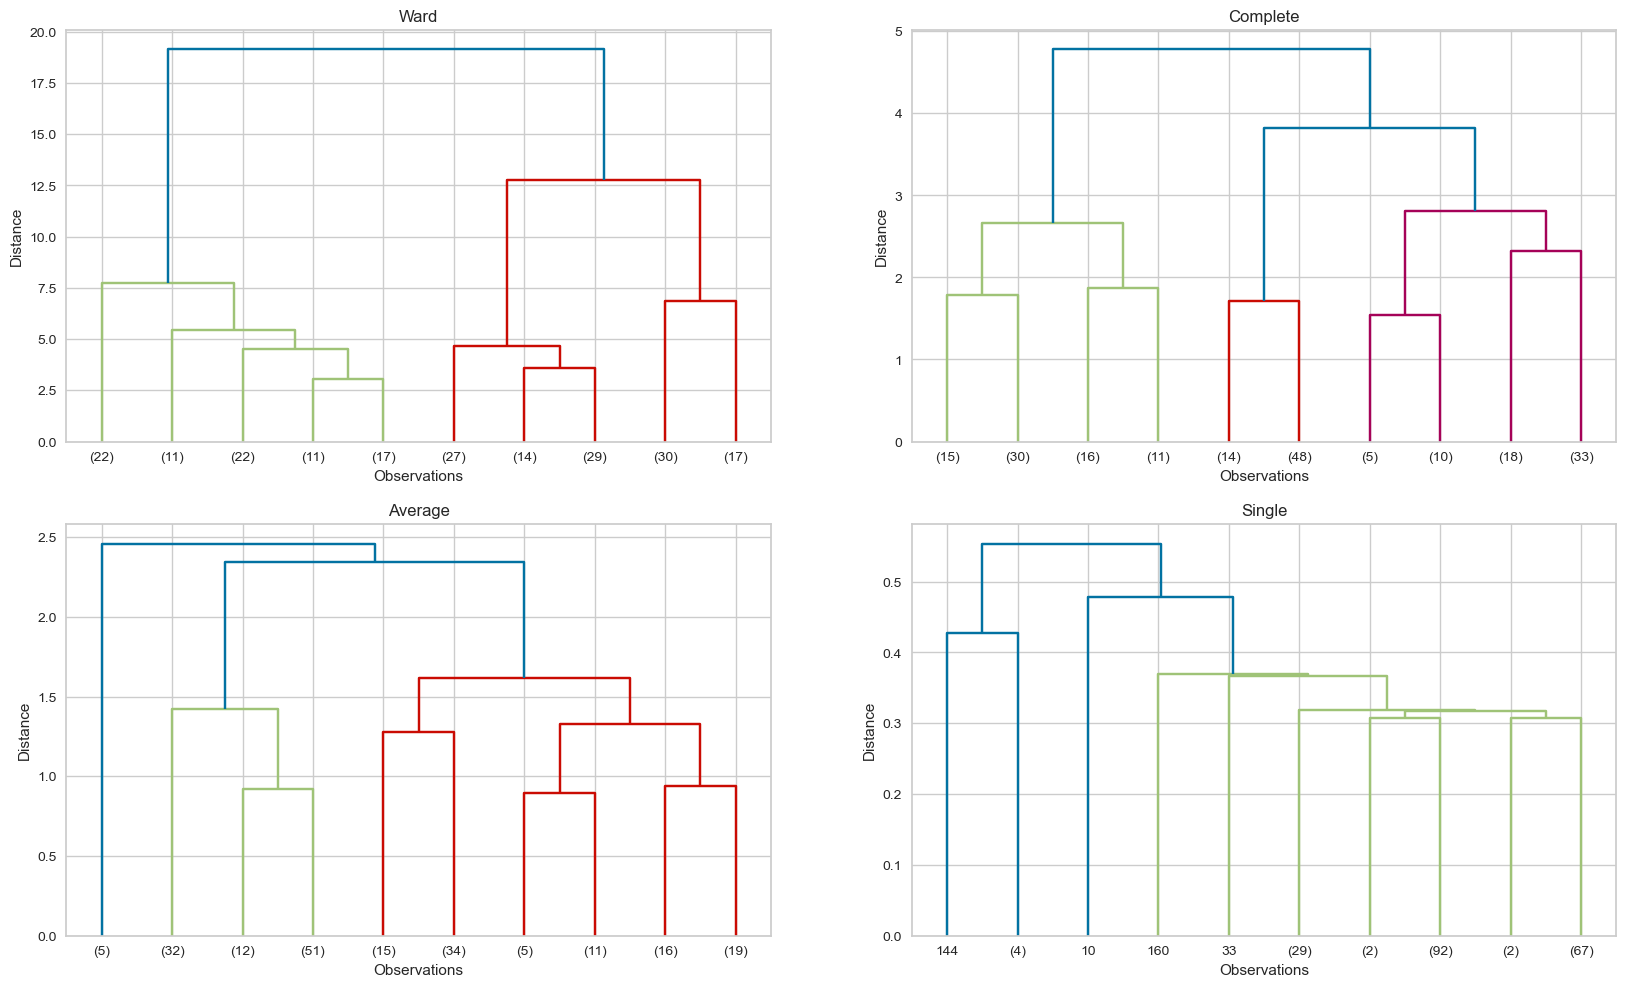

In [85]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size = 10, truncate_mode='lastp', p=10);

In [86]:
from sklearn.metrics import silhouette_score
range_n_clusters = range(2,11)
for num_clusters in range_n_clusters:
    # intialise kmeans
    Agg_model = AgglomerativeClustering(n_clusters=num_clusters)
    Agg_model.fit(X_df2_std)
    cluster_labels = Agg_model.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X_df2_std, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.41449964268735984
For n_clusters=3, the silhouette score is 0.41664148520394606
For n_clusters=4, the silhouette score is 0.3892700489345869
For n_clusters=5, the silhouette score is 0.3764554127950157
For n_clusters=6, the silhouette score is 0.3990690566534328
For n_clusters=7, the silhouette score is 0.3586046783668453
For n_clusters=8, the silhouette score is 0.3610812833213386
For n_clusters=9, the silhouette score is 0.365908374973662
For n_clusters=10, the silhouette score is 0.3688228754847425


## Clustering based on Annual Income and Spending Score- x2

In [87]:
df3.head()

,score,income
0,39,15
1,81,15
2,6,16
3,77,16
4,40,17


In [88]:
hopkins(df3, df.shape[0])

0.3076642611386598

### Unscaled Data

In [89]:
X_df3.head()

,score,income
0,39,15
1,81,15
2,6,16
3,77,16
4,40,17


#### Dendrogram

In [90]:
hc_ward = linkage(y = X_df3, method = "ward")
hc_complete = linkage(X_df3, "complete")
hc_average = linkage(X_df3, "average")
hc_single = linkage(X_df3, "single")

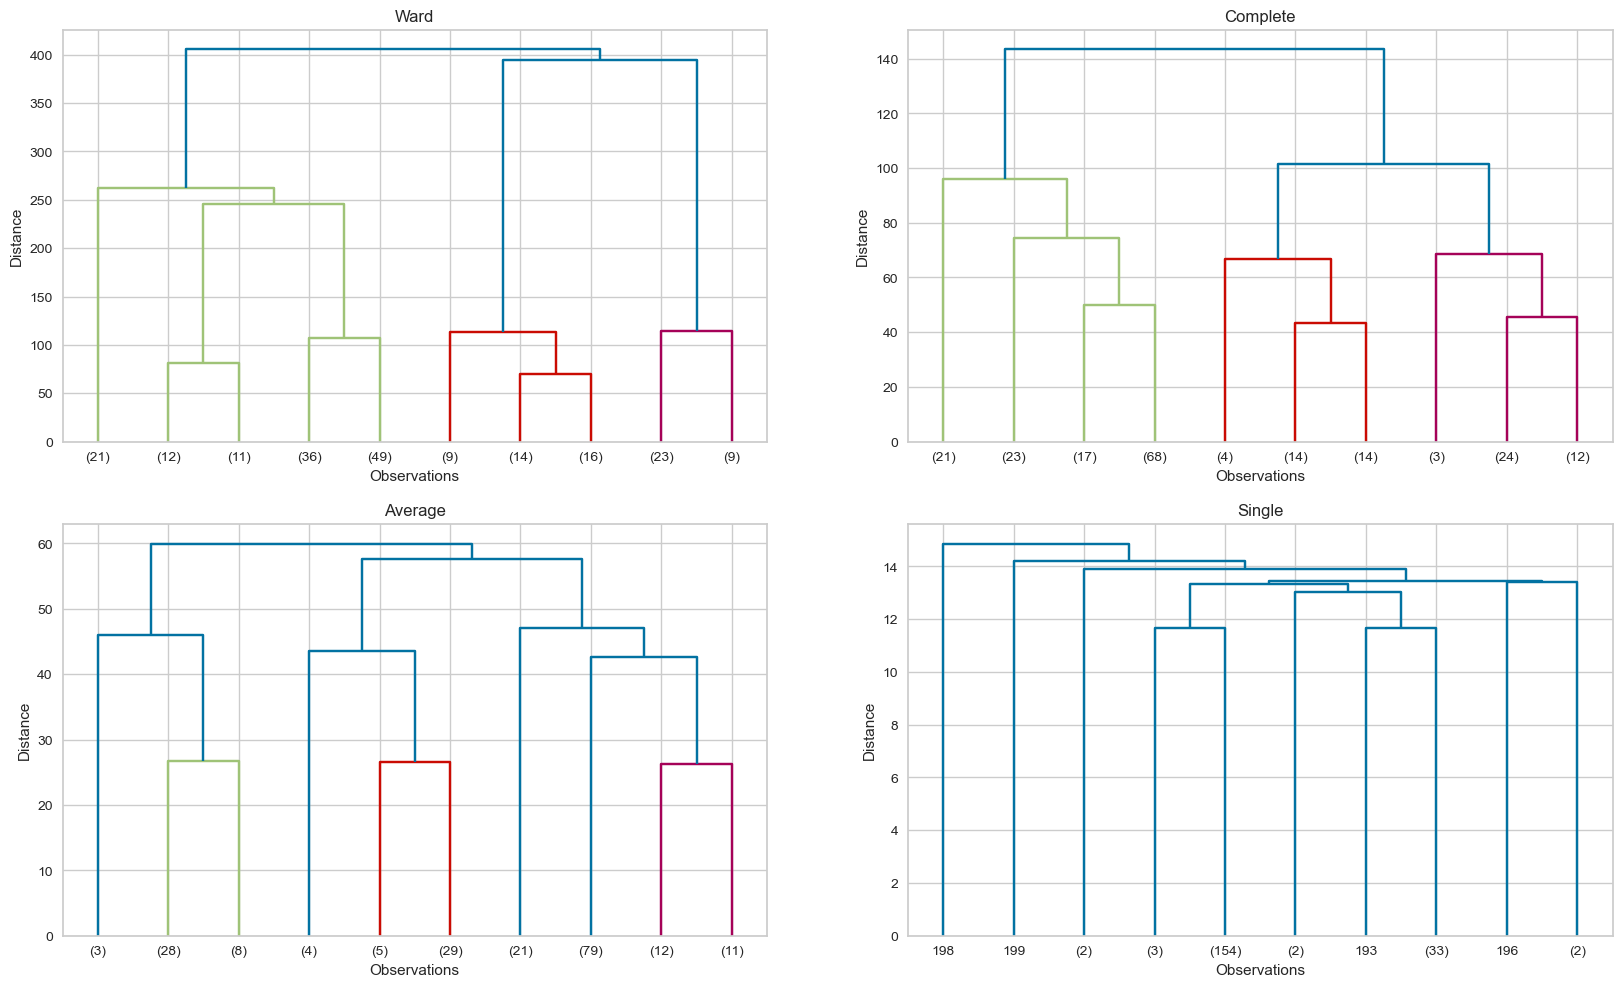

In [91]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size = 10, truncate_mode='lastp', p=10);

In [92]:
from sklearn.metrics import silhouette_score
range_n_clusters = range(2,11)
for num_clusters in range_n_clusters:
    # intialise kmeans
    Agg_model = AgglomerativeClustering(n_clusters=num_clusters)
    Agg_model.fit(X_df3)
    cluster_labels = Agg_model.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X_df3, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.36706444723912895
For n_clusters=3, the silhouette score is 0.4618340266628975
For n_clusters=4, the silhouette score is 0.4916598193892782
For n_clusters=5, the silhouette score is 0.5529945955148897
For n_clusters=6, the silhouette score is 0.5380208285578872
For n_clusters=7, the silhouette score is 0.519904611908887
For n_clusters=8, the silhouette score is 0.4326286245782246
For n_clusters=9, the silhouette score is 0.43892545672004507
For n_clusters=10, the silhouette score is 0.4342656377895271


### Scaled Data

In [93]:
X_df3_std[0:2]

array([[-0.43480148, -1.73899919],
       [ 1.19570407, -1.73899919]])

#### Dendrogram

In [94]:
hc_ward = linkage(y = X_df3_std, method = "ward")
hc_complete = linkage(X_df3_std, "complete")
hc_average = linkage(X_df3_std, "average")
hc_single = linkage(X_df3_std, "single")

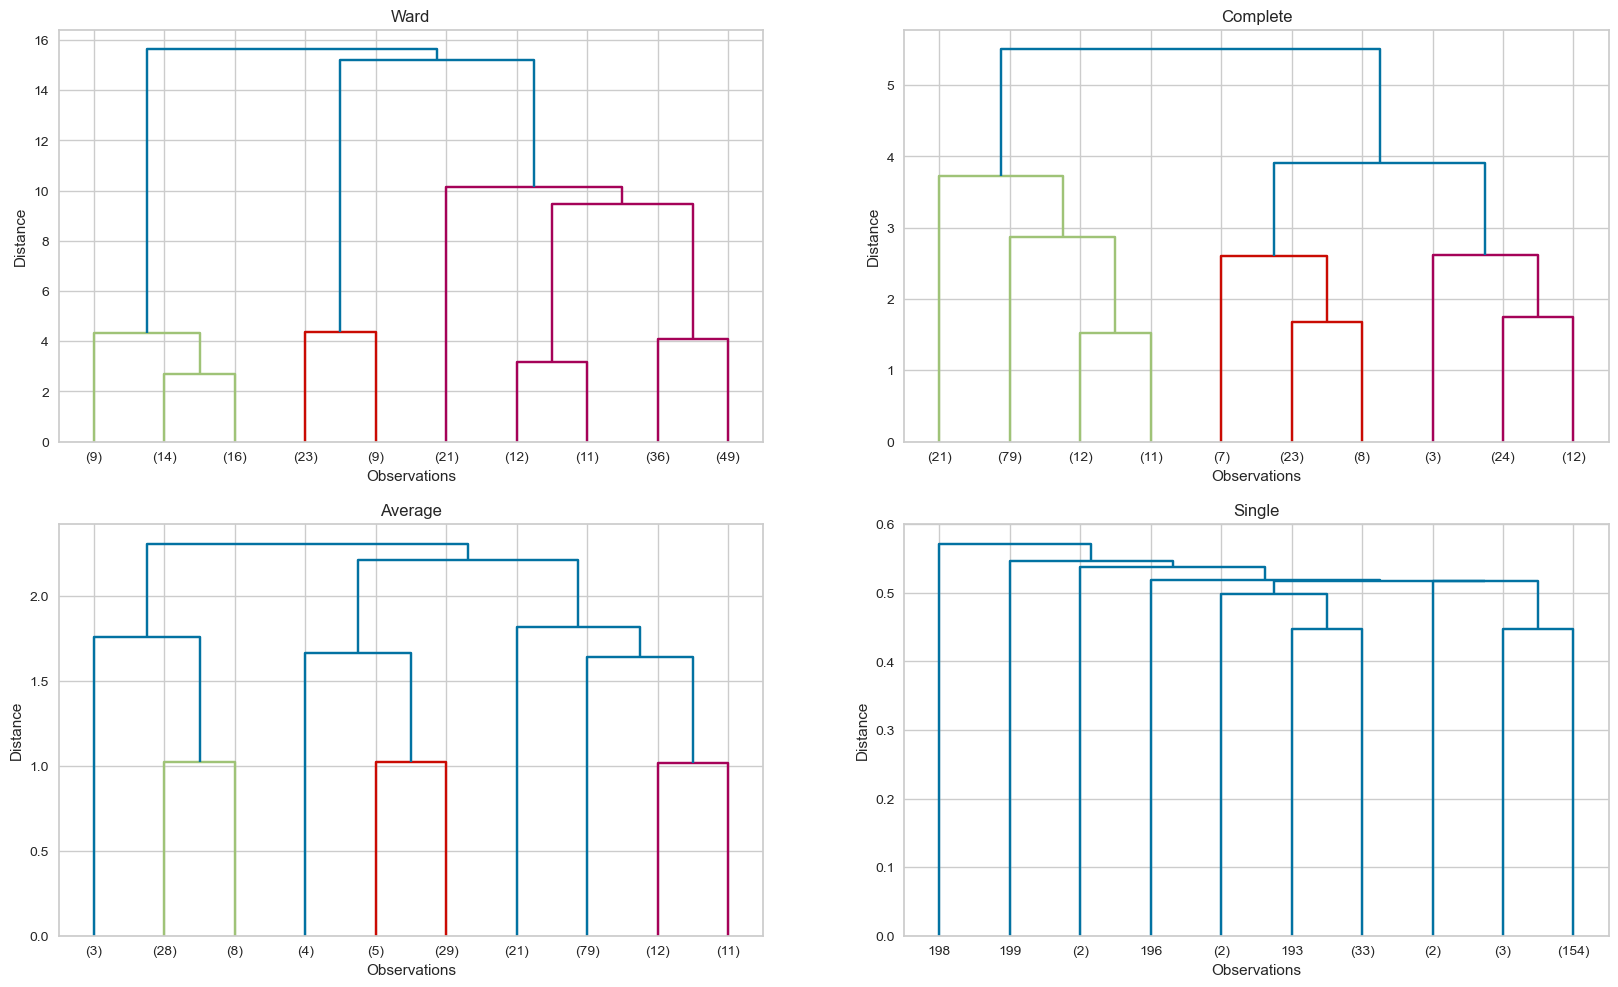

In [95]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size = 10, truncate_mode='lastp', p=10);

In [96]:
from sklearn.metrics import silhouette_score
range_n_clusters = range(2,11)
for num_clusters in range_n_clusters:
    # intialise kmeans
    Agg_model = AgglomerativeClustering(n_clusters=num_clusters)
    Agg_model.fit(X_df3_std)
    cluster_labels = Agg_model.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X_df3_std, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.3842337621772661
For n_clusters=3, the silhouette score is 0.46104814465704463
For n_clusters=4, the silhouette score is 0.4925507715349343
For n_clusters=5, the silhouette score is 0.5538089226688662
For n_clusters=6, the silhouette score is 0.5386761871036926
For n_clusters=7, the silhouette score is 0.5197949293475769
For n_clusters=8, the silhouette score is 0.4308617778221774
For n_clusters=9, the silhouette score is 0.4376899775815414
For n_clusters=10, the silhouette score is 0.4339007174968657


### ii. *Apply Agglomerative Clustering*

In [97]:
from sklearn.cluster import AgglomerativeClustering

#### Age and Spending Score- x1

#### Unscaled Data

In [98]:
model_df2 = AgglomerativeClustering(n_clusters=3, affinity = "euclidean", linkage = "ward")
model_df2.fit_predict(X_df2)

array([0, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 0, 0, 1, 0, 1,
       2, 1, 2, 1, 0, 0, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1,
       2, 1], dtype=int64)

#### Scaled Data

In [99]:
model_df2_std = AgglomerativeClustering(n_clusters=3, affinity = "euclidean", linkage = "ward")
model_df2.fit_predict(X_df2_std)

array([1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       0, 2, 0, 1, 1, 1, 0, 2, 2, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       2, 0, 1, 1, 0, 0, 0, 0, 0, 1, 2, 2, 1, 0, 0, 2, 0, 0, 1, 0, 0, 1,
       2, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 2, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       1, 2, 1, 2, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       0, 2, 1, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 1, 2, 1, 2, 1, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2], dtype=int64)

#### Annual Income and Spending Score- x2

#### Unscaled Data

In [100]:
model_df3 = AgglomerativeClustering(n_clusters=5, affinity = "euclidean", linkage = "ward")
model_df3.fit_predict(X_df3)

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

#### Scaled Data

In [101]:
model_df3_std = AgglomerativeClustering(n_clusters=5, affinity = "euclidean", linkage = "ward")
model_df3_std.fit_predict(X_df3_std)

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 2,
       4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 0, 1, 0, 1,
       2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1], dtype=int64)

### iii. *Visualizing and Labeling All the Clusters* 

#### Age and Spending Score- x1

#### Unscaled Data 

In [102]:
clusters = model_df2.fit_predict(X_df2)
#X_df2["cluster"] = clusters

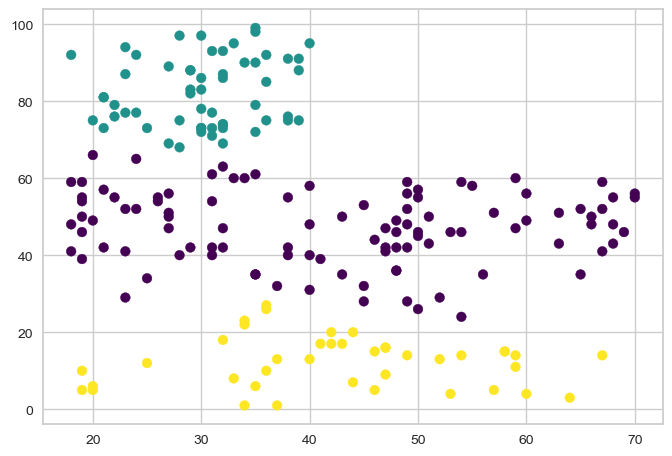

In [103]:
plt.scatter(df2["Age"], df2["score"], c = clusters, cmap = "viridis")

#### Scaled Data

In [104]:
clusters = model_df2_std.fit_predict(X_df2_std)
df2_std_c["cluster_hierarchical"] = clusters

In [105]:
df2_std_c[0:2]

,Age,score,Classes_df2_std,cluster_hierarchical
0,-1.425,-0.435,2,1
1,-1.281,1.196,1,2


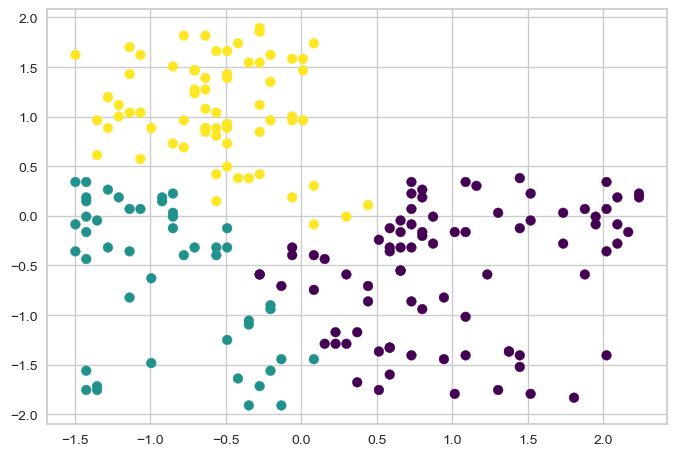

In [106]:
plt.scatter (df2_std_c["Age"], df2_std_c["score"], c = clusters, cmap = "viridis")

#### Annual Income and Spending Score- x2

#### Unscaled Data

In [107]:
clusters = model_df3.fit_predict(X_df3)
#X_df2["cluster"] = clusters

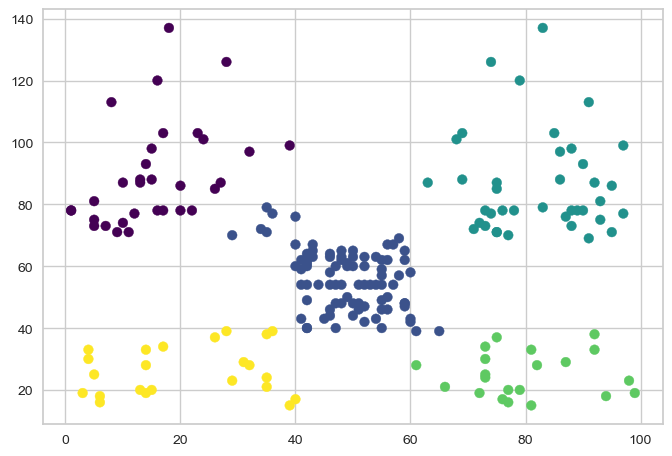

In [108]:
plt.scatter(df3["score"], df3["income"],  c = clusters, cmap = "viridis")

#### Scaled Data

In [109]:
clusters = model_df3_std.fit_predict(X_df3)

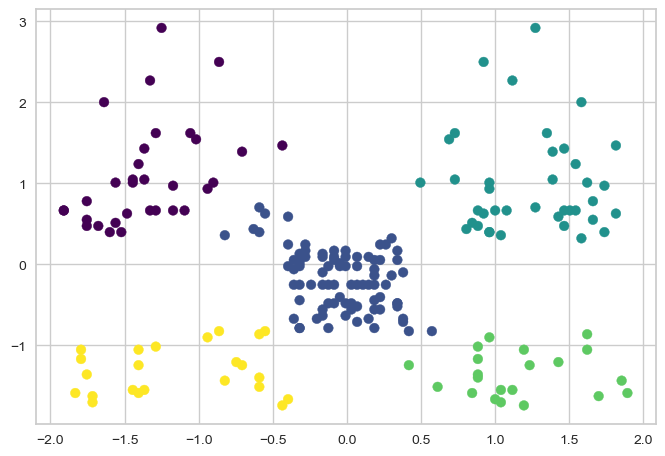

In [110]:
plt.scatter (df3_std_c["score"], df3_std_c["income"], c = clusters, cmap = "viridis")

#### Interpretation based on Age and Spending Score- x1

In [111]:
df.head()

,Gender,Age,income,score,Age_category,Classes_df2_std,Classes_df2,Classes_df3,Classes_df3_std
0,Male,19,15,39,18&19,2,2,2,2
1,Male,21,15,81,Twenties,1,1,0,0
2,Female,20,16,6,Twenties,2,0,2,2
3,Female,23,16,77,Twenties,1,1,0,0
4,Female,31,17,40,Thirties,2,2,2,2


In [112]:
clusters = df["Gender"]

<AxesSubplot:xlabel='Age', ylabel='score'>

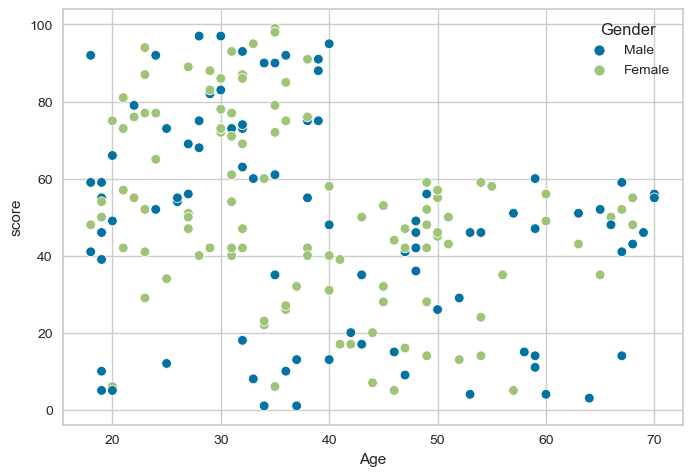

In [113]:
sns.scatterplot(data=df, x="Age", y="score", hue="Gender", legend="auto")

<AxesSubplot:xlabel='Age_category', ylabel='score'>

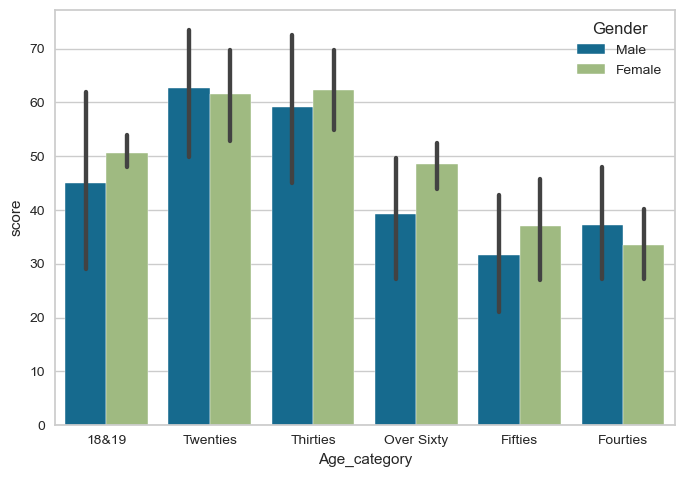

In [114]:
sns.barplot(data=df, x="Age_category", y="score", hue="Gender")

In [115]:
df.groupby(['Gender', 'score', 'Age_category']).value_counts(sort = "score")

Gender  score  Age_category  Age  income  Classes_df2_std  Classes_df2  Classes_df3  Classes_df3_std
Female  5      Fifties       57   75      0                0            4            4                  1
               Fourties      46   25      2                0            2            2                  1
        6      Thirties      35   18      2                0            2            2                  1
               Twenties      20   16      2                0            2            2                  1
        7      Fourties      44   73      2                0            4            4                  1
        13     Fifties       52   88      0                0            4            4                  1
        14     Fifties       54   28      0                0            2            2                  1
               Fourties      49   33      2                0            2            2                  1
        15     Fifties       58   20      0        

In [116]:
df.sort_values("Classes_df2_std")

,Gender,Age,income,score,Age_category,Classes_df2_std,Classes_df2,Classes_df3,Classes_df3_std
53,Male,59,43,60,Fifties,0,2,1,1
73,Female,60,50,56,Over Sixty,0,2,1,1
72,Female,60,50,49,Over Sixty,0,2,1,1
71,Female,47,49,42,Fourties,0,2,1,1
70,Male,70,49,55,Over Sixty,0,2,1,1
128,Male,59,71,11,Fifties,0,0,4,4
67,Female,68,48,48,Over Sixty,0,2,1,1
66,Female,43,48,50,Fourties,0,2,1,1
64,Male,63,48,51,Over Sixty,0,2,1,1
74,Male,59,54,47,Fifties,0,2,1,1


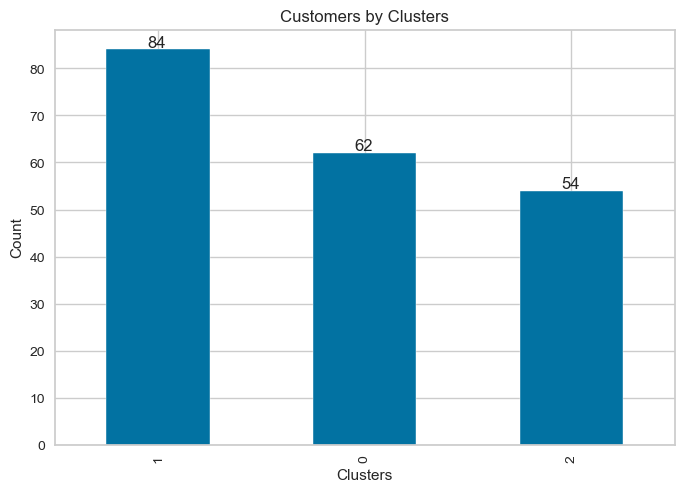

In [117]:
plt.title("Customers by Clusters")
plt.xlabel("Clusters")
plt.ylabel("Count")
ax = df["Classes_df2_std"].value_counts().plot(kind='bar')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() +0.2, p.get_height() + 0.5))

In [118]:
df.mean()[0:3]

Age      38.850
income   60.560
score    50.200
dtype: float64

In [119]:
df[df.Gender == "Male"].mean()[0:3]

Age      39.807
income   62.227
score    48.511
dtype: float64

In [120]:
df[df.Gender == "Female"].mean()[0:3]

Age      38.098
income   59.250
score    51.527
dtype: float64

In [121]:
df[df.Classes_df2_std == 0].mean()[0:3]

Age      56.081
income   54.355
score    40.306
dtype: float64

In [122]:
df[df.Classes_df2_std == 1].mean()[0:3]

Age      28.714
income   62.143
score    73.798
dtype: float64

In [123]:
df[df.Classes_df2_std == 2].mean()[0:3]

Age      34.833
income   65.222
score    24.852
dtype: float64

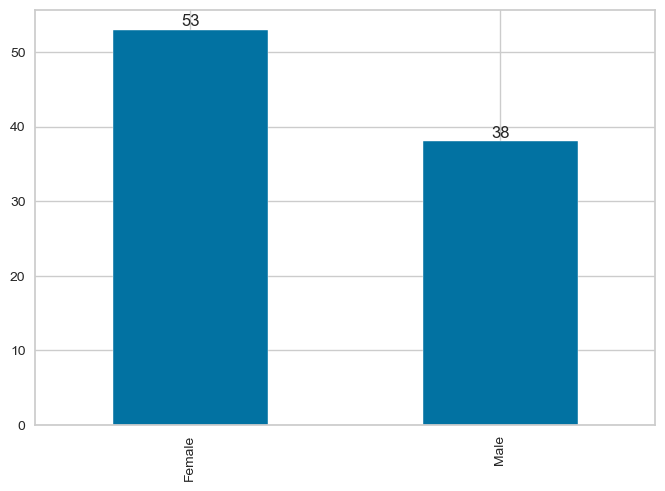

In [124]:
ax = df[(df["Age"] < 40) & (df["score"] > 40)]["Gender"].value_counts().plot.bar()
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.22, p.get_height()+0.50))

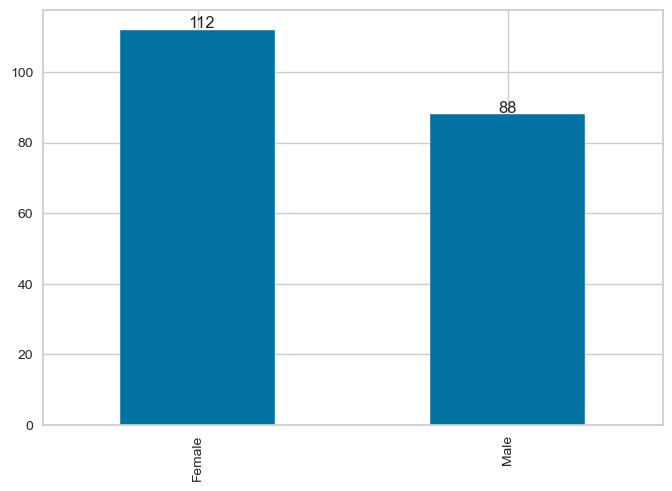

In [125]:
ax = df["Gender"].value_counts().plot.bar()
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.22, p.get_height()+0.50))

### Conclusion for age and spending scores

**cluster 0** : The average age is around 56, both annula_income and spending_scores are under average. 
It should be researched what can be done to direct to more spending. This cluster can be our second target cluster.

**cluster 1**: The average age is around 28, This cluster has high spending score average, high income average and they have lowest age average. If our aim is marketing, this cluster can be our target. Because we also know that ages between 18-39 has spending more than ages over 40. This group consists of our loyal customers. Our company derives the main profit from this group. Very special promotions can be made in order not to miss it.    

**cluster 2** :The average age is around 35. The annula_income is high but spending_scores are the lowest. 
This cluster can be out of our interest at the beginning

#### Interpretation based on Annual Income and Spending Score- x2

In [126]:
df.head()

,Gender,Age,income,score,Age_category,Classes_df2_std,Classes_df2,Classes_df3,Classes_df3_std
0,Male,19,15,39,18&19,2,2,2,2
1,Male,21,15,81,Twenties,1,1,0,0
2,Female,20,16,6,Twenties,2,0,2,2
3,Female,23,16,77,Twenties,1,1,0,0
4,Female,31,17,40,Thirties,2,2,2,2


<AxesSubplot:xlabel='income', ylabel='score'>

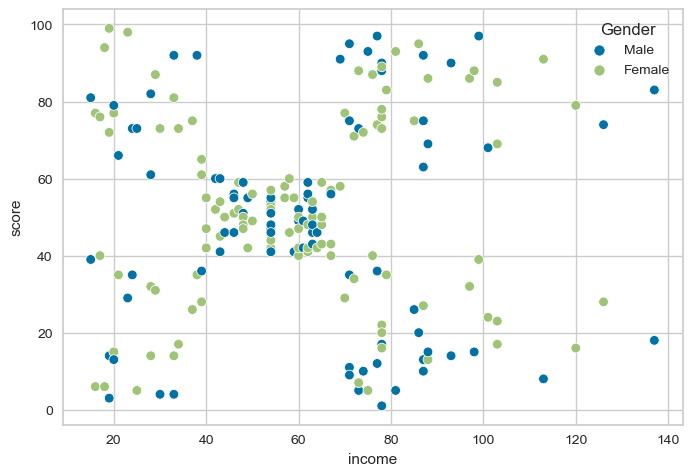

In [127]:
sns.scatterplot(data=df, x="income", y="score", hue="Gender", legend="auto")

In [128]:
df.sort_values("Classes_df3_std")

,Gender,Age,income,score,Age_category,Classes_df2_std,Classes_df2,Classes_df3,Classes_df3_std
19,Female,35,23,98,Thirties,1,1,0,0
37,Female,30,34,73,Thirties,1,1,0,0
35,Female,21,33,81,Twenties,1,1,0,0
33,Male,18,33,92,18&19,1,1,0,0
31,Female,21,30,73,Twenties,1,1,0,0
45,Female,24,39,65,Twenties,1,1,0,0
29,Female,23,29,87,Twenties,1,1,0,0
27,Male,35,28,61,Thirties,1,2,0,0
25,Male,29,28,82,Twenties,1,1,0,0
23,Male,31,25,73,Thirties,1,1,0,0


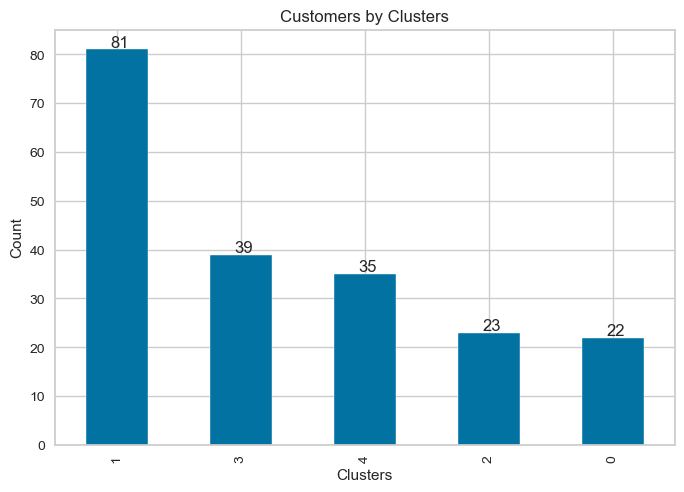

In [129]:
plt.title("Customers by Clusters")
plt.xlabel("Clusters")
plt.ylabel("Count")
ax = df["Classes_df3_std"].value_counts().plot(kind='bar')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() +0.2, p.get_height() + 0.5))

In [130]:
df.mean()[0:3]

Age      38.850
income   60.560
score    50.200
dtype: float64

In [131]:
df[df.Classes_df3_std == 0].mean()[0:3]

Age      25.273
income   25.727
score    79.364
dtype: float64

In [132]:
df[df.Classes_df3_std == 1].mean()[0:3]

Age      42.716
income   55.296
score    49.519
dtype: float64

In [133]:
df[df.Classes_df3_std == 2].mean()[0:3]

Age      45.217
income   26.304
score    20.913
dtype: float64

In [134]:
df[df.Classes_df3_std == 3].mean()[0:3]

Age      32.692
income   86.538
score    82.128
dtype: float64

In [135]:
df[df.Classes_df3_std == 4].mean()[0:3]

Age      41.114
income   88.200
score    17.114
dtype: float64

In this cluster, customer's age are over average, and their income is highest but spending score is lowest. 
This customers in this cluster must be searched by company and tried to find what is the reason why they are not spending. 
At the beginning this cluster can be out of interest also.

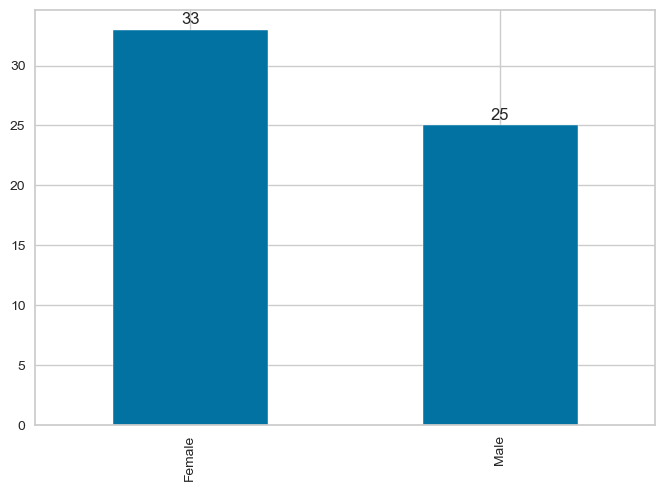

In [136]:
ax = df[(df["Age"] < 40) & (df["score"] > 40) & (df["income"] > 50)]["Gender"].value_counts().plot.bar()
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.22, p.get_height()+0.50))

There is a little difference between loyal customer's gender distribution

## Conclusion for spending scores and annual income

## Conclusion for Genders

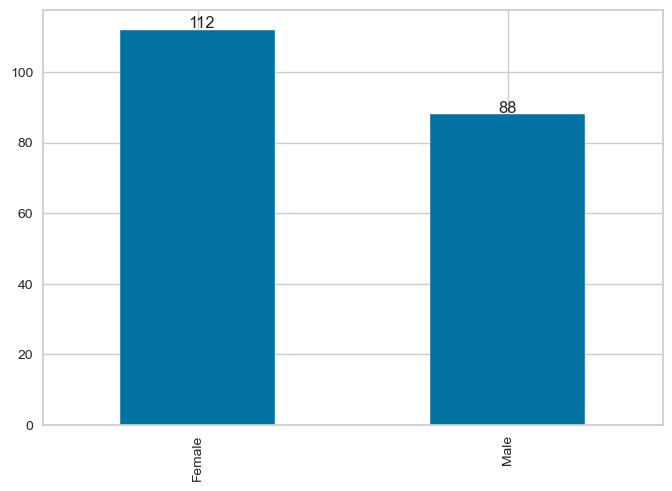

In [137]:
ax = df["Gender"].value_counts().plot.bar()
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.22, p.get_height()+0.50))

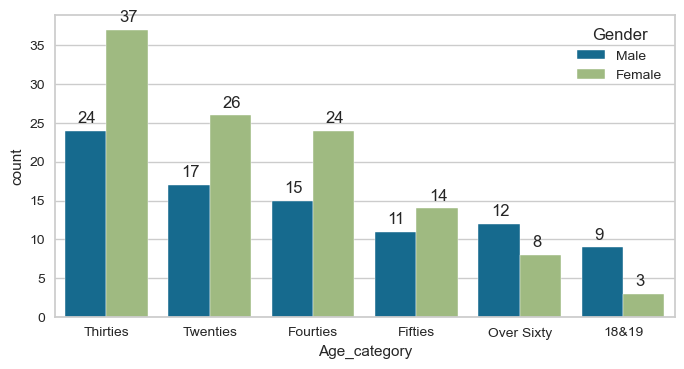

In [138]:
plt.rcParams["figure.figsize"] = (8,4)
ax = sns.countplot(df.Age_category, hue=df.Gender, order = df.Age_category.value_counts().index)
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.12, p.get_height()+1))

In [139]:
df.mean()[0:3]

Age      38.850
income   60.560
score    50.200
dtype: float64

In [140]:
df[df["Gender"] == "Female"].mean()[0:3]

Age      38.098
income   59.250
score    51.527
dtype: float64

### Female

** The average age of female customers is around 38, both annula_income and spending_scores are on average. 

** There is 112 female customers in data set, female customers are a little more than male customers

** We have more female customers Age under 40

** Age Under 40, score over 40 and income over 50 -loyal customers- when we check the genders in that situation we can see that females has higher spending score. The products for female customers or promotions for female can be a little higher than male customers

** Female customers has a less income than from male customers, but they spend  more than male customers. But for this data set, it is a little difference


In [141]:
df[df["Gender"] == "Male"].mean()[0:3]

Age      39.807
income   62.227
score    48.511
dtype: float64

### Male

** The average age of male customers is around 40, both annula_income and spending_scores are on average. 

** There is 88 male customers in data set, male customers are a little less than female customers

** We have less male customers Age under 40

** Male customers has more income than from female customers, but they spend  less than female customers. But for this data set, it is a little diffrence. To direct male customers for more spending, more promotions can be arranged

** Age Under 40, score over 40 and income over 50 -loyal customers- when we check the genders in that situation we can see that males are less then female customers. But for this data set, it is a little difference.